<a href="https://colab.research.google.com/github/HimYogi/LinearRegression/blob/main/LMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [6]:
train_data.isna().sum()

x    0
y    1
dtype: int64

In [7]:
train_data_filled = train_data.fillna(0)

In [14]:
train_data = train_data.dropna()

In [15]:
train_data.isna().sum()

x    0
y    0
dtype: int64

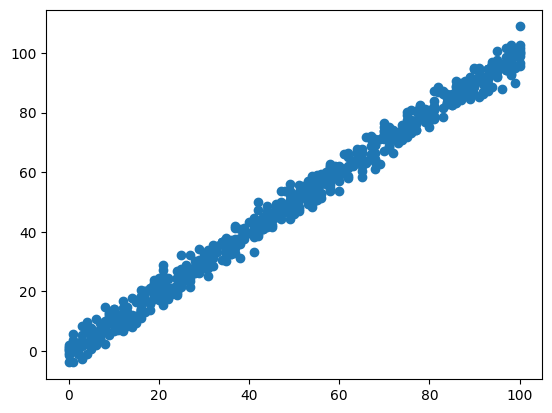

In [33]:
x = pd.DataFrame(train_data['x'])
y = train_data['y']
plt.scatter(x,y)

In [17]:
train_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [62]:
x['intercept'] = 1
X = np.array(x)
Y = np.array(y)
theta = np.array([0,0])


In [54]:
a = sum((X.dot(theta) - y)**2)/2/m
a

1670.062413089335

In [67]:
def cost_function(X,Y,theta):

  m=len(Y)
  J = sum((X.dot(theta) - y)**2)/2/m

  return J

In [68]:
print(cost_function(X,Y,theta))

1670.062413089335


Now create the function to perform gradient descent - which will first calculate J(θ) for the given theta, then change the theta as per the derivative of J(θ),
θ := θ - 𝛂𝛅J/𝛅θ
Now we will have to define 𝛂 as some arbitrary value, let's say 0.01. This is called the step of gradient descent.
Partial derivative of J will give us the tangent at that point, we know take a step towards the minima using this.
If the derivative is positive means 0 < tanθ < 90 or acute angle, which dictates that in order to reach the local minima we will have to take a step back from our previous theta, since we are plotting J as a function of θ.
Similarly if derivative is negative it means that the angle is obtuse and we would need to take a step forward to reach the local minima. As J(0) reaches the minima the derivative will keep on becoming smaller, which makes for smaller steps towards the minima hence we get closer to minima. In the off chance that the theta oscillates between the minima it will still be a good bet since we would be closer to the minima. ***We will explore this oscillation further.***


In [144]:
alpha = 0.000005
itr = 1500

In [91]:
def gradient_descent(X,Y,theta,alpha,itr):
  m=len(Y)
  cost_history = [0]*itr
  for i in range(itr):
    der = (X.T.dot(X.dot(theta) - Y))/m
    theta = theta - alpha*der
    cost_history[i] = cost_function(X,Y,theta)

  return theta,cost_history

In [145]:
(t,c) = gradient_descent(X,Y,theta,alpha,itr)

In [146]:
print(t)
print(c[-10:])

[0.99882861 0.01473455]
[3.935742521449634, 3.9357425167712248, 3.9357425120928338, 3.935742507414454, 3.9357425027360784, 3.9357424980577163, 3.935742493379365, 3.935742488701032, 3.935742484022709, 3.935742479344394]


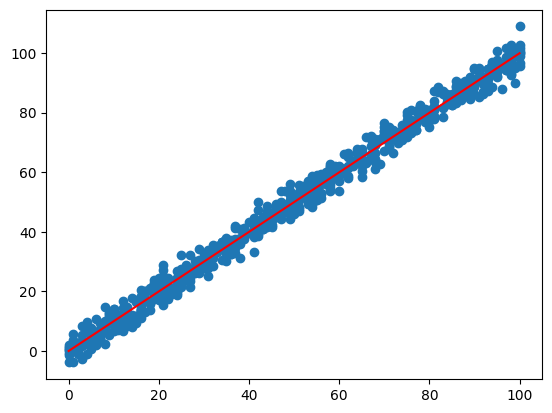

In [156]:
plt.scatter(x.x,y)
# Generate x-values
x_values = np.linspace(0, 100, 100)  # Generating 100 points between -10 and 10

# Calculate corresponding y-values using the equation of the line y = theta1*x + theta0
y_values = t[0] * x_values + t[1]

# Plot the line
plt.plot(x_values, y_values,color='red', label='best fit line')


Now we have got the best fit line and our hypothesis function is ready, therefore we can now test our model against the test dataset and see the accuracy of our predictions.

In [157]:
test_df = pd.read_csv('test.csv')

In [193]:
x_test = pd.DataFrame(test_df['x'])
x_test['intercept'] = 1
predictions = x_test.dot(t)
y_test = test_df['y']


In [200]:
predc_df = pd.concat([x_test['x'],y_test,predictions],axis = 1,keys = ['x','y','h(x)'])

,x,y,h(x)
0,77,79.775152,76.924537
1,21,23.177279,20.990135
2,22,25.609262,21.988964
3,20,17.857388,19.991307
4,36,41.849864,35.972564
...,...,...,...
295,71,68.545888,70.931566
296,46,47.334876,45.960850
297,55,54.090637,54.950308
298,62,63.297171,61.942108


In [201]:
predc_df

,x,y,h(x)
0,77,79.775152,76.924537
1,21,23.177279,20.990135
2,22,25.609262,21.988964
3,20,17.857388,19.991307
4,36,41.849864,35.972564
...,...,...,...
295,71,68.545888,70.931566
296,46,47.334876,45.960850
297,55,54.090637,54.950308
298,62,63.297171,61.942108
